In [16]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pyphotonicsims.components.elements import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [3.5,3]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Two-coupled ring resonator, ring #1 is coupled to bus

#### Laser freqeuncy sweep for single resonator frequency

In [111]:
def cmt_tworing_solve_a(dw, w_list, r_in_list, r_ex_list, g, b):
    r_total = r_in_list + r_ex_list
    n = len(r_in_list)
    A = np.diag(1j*(w_list - dw) - r_total/2) + 1j*g*(np.ones((n,n)) - np.eye(n))
    a = np.linalg.solve(A, b)
    return a

(0.0, 1.1)

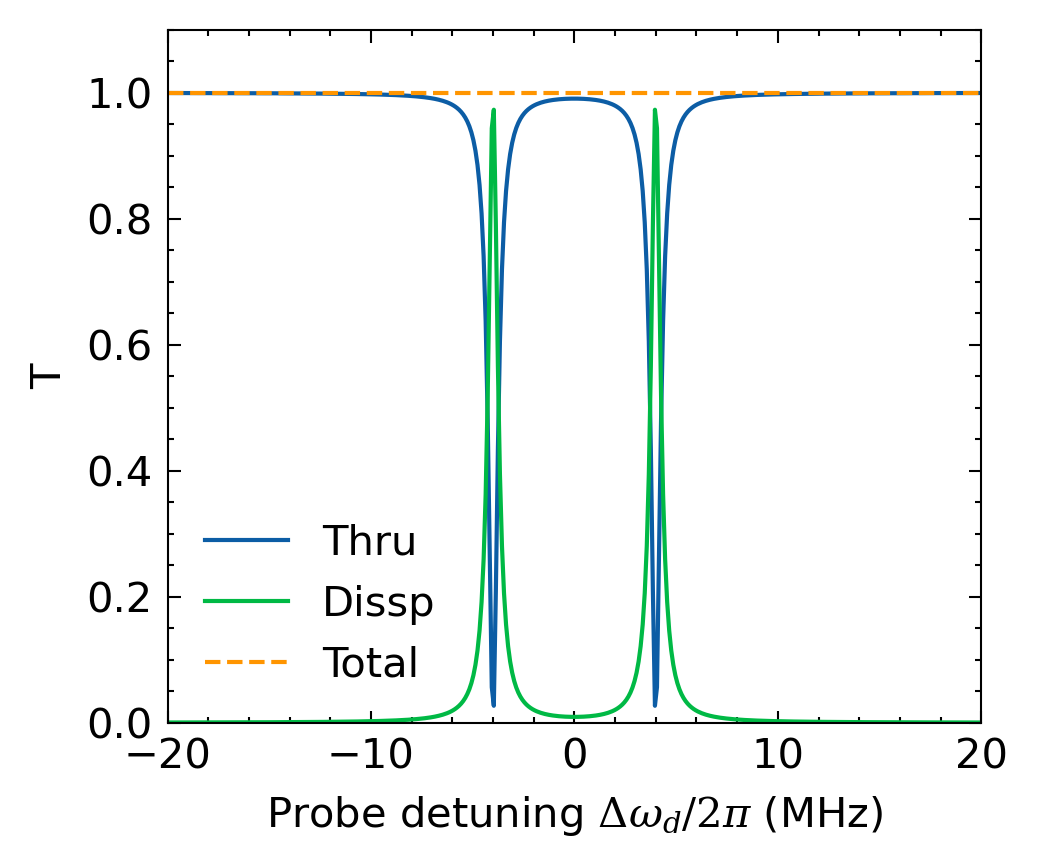

In [115]:
w1 = 0
w2 = 0
r1 = 0.3
r2 = 0.3
r_ex = 0.5
w_list = np.array([w1, w2])
r_in_list = np.array([r1, r2])
r_ex_list = np.array([r_ex, 0])
g = 4

dw_x = np.linspace(-20, 20, 400)
a = 1j*np.zeros((len(dw_x), len(w_list)))
b = 1j*np.array([-np.sqrt(r_ex), 0])

for ii in range(len(dw_x)):
    a[ii, :] = cmt_tworing_solve_a(dw_x[ii], w_list, r_in_list, r_ex_list, g, b)
    
T = np.abs(1+1j*np.sqrt(r_ex)*a[:,0])**2
Dissp = r1*np.sum(np.abs(a)**2, axis=1)


plt.figure(dpi = 300)
plt.plot(dw_x, T, label='Thru')
plt.plot(dw_x, Dissp, label='Dissp')
plt.plot(dw_x, T+Dissp, '--', label='Total')
plt.legend()
plt.ylabel('T')
plt.xlabel(r'Probe detuning $\Delta\omega_d/2\pi$ (MHz)')
plt.xlim((-20, 20))
plt.ylim((0, 1.1))

#### Spectrogram with tuning one resonator

Text(0, 0.5, 'Probe detuing $\\Delta\\omega_d/2\\pi$ (MHz)')

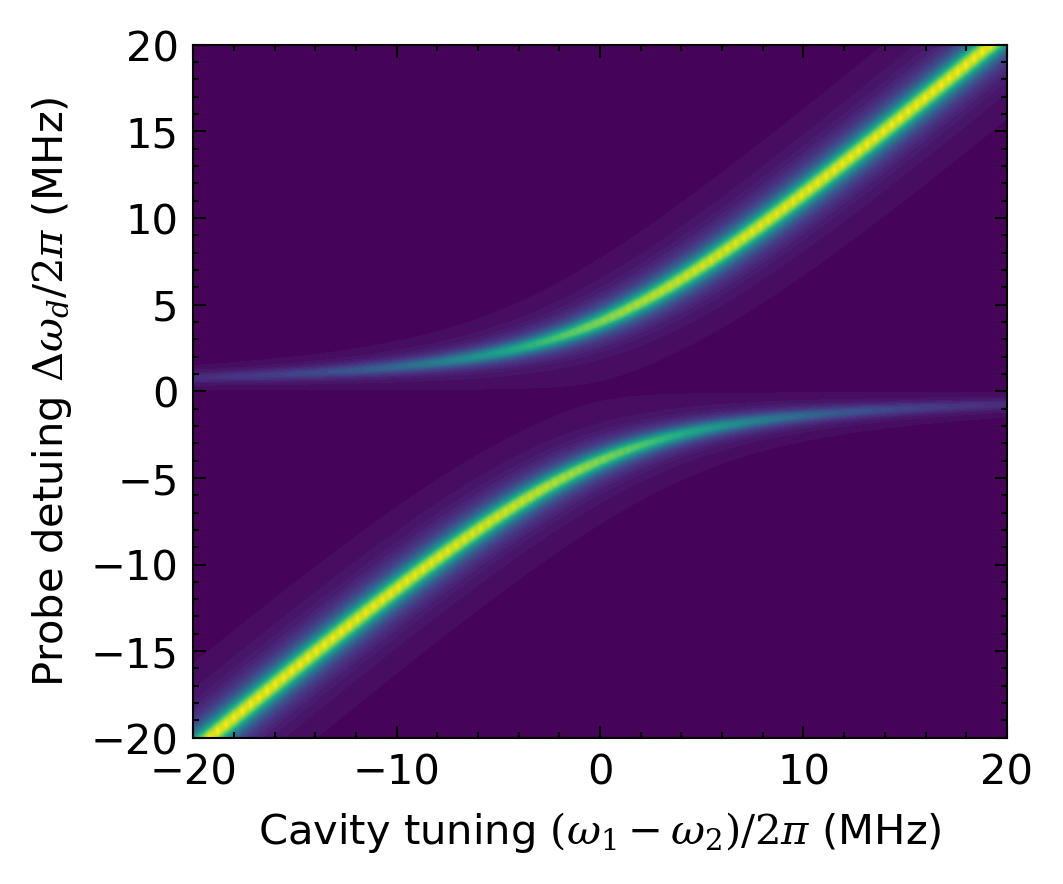

In [116]:
w1 = 0
w2 = 0
r1 = 0.3
r2 = 0.3
r_ex = 0.5
w_list = np.array([w1, w2])
r_in_list = np.array([r1, r2])
r_ex_list = np.array([r_ex, 0])
g = 4

w1_x_list = np.linspace(-20, 20, 100)
dw_x = np.linspace(-20, 20, 500)
a = 1j*np.zeros((len(dw_x), len(w_list)))
b = 1j*np.array([-np.sqrt(r_ex), 0])
T = np.zeros((len(w1_x_list), len(dw_x)))

for ii in range(len(w1_x_list)):
    for jj in range(len(dw_x)):
        dw = np.array([w1_x_list[ii], w2])
        a[jj, :] = CPM_solve_a(dw_x[jj], dw, r_in_list, r_ex_list, g, b)
    T[ii, :] = np.abs(1+1j*np.sqrt(r_ex)*a[:,0])**2

X, Y = np.meshgrid(w1_x_list, dw_x)
plt.figure(dpi = 300)
plt.contourf(X, Y, 1 - T.T, levels = 50)
plt.xlabel(r'Cavity tuning $(\omega_1 - \omega_2)/2\pi$ (MHz)')
plt.ylabel(r'Probe detuing $\Delta\omega_d/2\pi$ (MHz)')

## N-coupled-ring (in series) filter CMT model

In [109]:
def cmt_Nringfilter_solve_a(dw, w_list, r_in_list, r_ex_list, g, b):
    r_total = r_in_list + r_ex_list
    n = len(r_in_list)
    A = np.diag(1j*(w_list - dw) - r_total/2) + 1j*g*(np.triu(np.tril(np.ones((n,n)),1),-1) - np.eye(n))
    a = np.linalg.solve(A, b)
    return a

(0.0, 1.1)

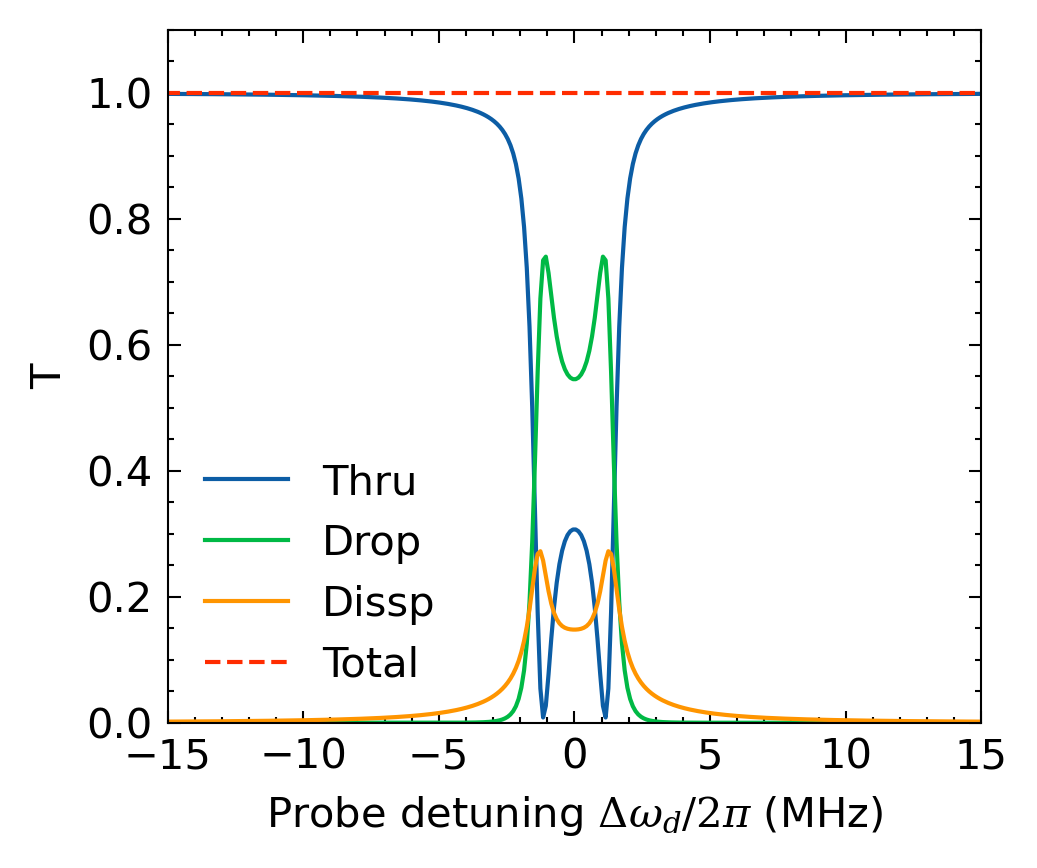

In [148]:
N = 4
r_in = 0.1
r_ex = 4.0
g = 1
w_list = np.zeros(N)
r_in_list = np.ones(N)*r_in
r_ex_list = np.zeros(N)
r_ex_list[0] = r_ex
r_ex_list[-1] = r_ex

dw_x = np.linspace(-20, 20, 400)
a = 1j*np.zeros((len(dw_x), len(w_list)))
b = 1j*np.zeros(N)
b[0] = -1j*np.sqrt(r_ex)

for ii in range(len(dw_x)):
    a[ii, :] = cmt_Nringfilter_solve_a(dw_x[ii], w_list, r_in_list, r_ex_list, g, b)
    
T = np.abs(1+1j*np.sqrt(r_ex)*a[:,0])**2
D = np.abs(1j*np.sqrt(r_ex)*a[:,-1])**2
Dissp = r_in*np.sum(np.abs(a)**2, axis=1)


plt.figure(dpi = 300)
plt.plot(dw_x, T, label='Thru')
plt.plot(dw_x, D, label='Drop')
plt.plot(dw_x, Dissp, label='Dissp')
plt.plot(dw_x, T+D+Dissp, '--', label='Total')
plt.legend()
plt.ylabel('T')
plt.xlabel(r'Probe detuning $\Delta\omega_d/2\pi$ (MHz)')
plt.xlim((-15, 15))
plt.ylim((0, 1.1))